# Regularization in Logistic regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from Logistic_Regression_Regularization import *
import warnings
warnings.filterwarnings("ignore")

# Andrew Ng Coursera data set

In [2]:
data = pd.read_csv('ex2data2.txt',header = None)

In [3]:
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


# Data Visualization

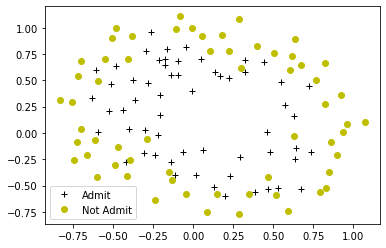

In [4]:
plt.plot(data[0][data[2] == 1],data[1][data[2] == 1],'k+',label = 'Admit')
plt.plot(data[0][data[2] == 0],data[1][data[2] == 0],'yo',label = 'Not Admit')
plt.legend()
plt.show()

# Polynomial Feature with 6 degree 

In [5]:
log_reg = logistic_regression_reg()
X = data[[0,1]]
y = data[2].values
X1 = log_reg.mapfeature(X,6)

In [6]:
X1.shape

(118, 28)

In [7]:
initial_theta = np.zeros((X1.shape[1]))

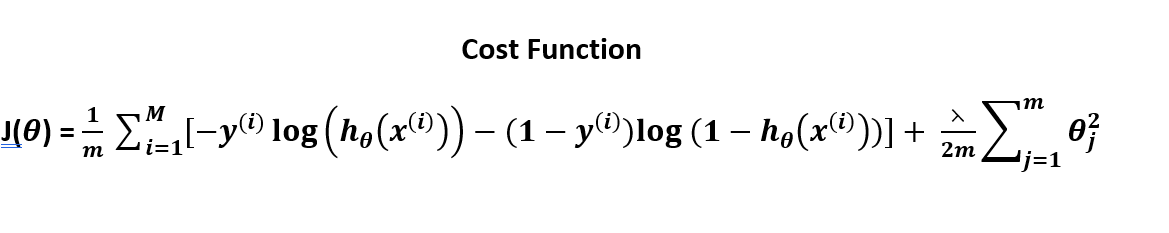

In [8]:
from IPython.display import Image
Image("Reg_CostFunction.PNG")

In [9]:
cost = log_reg.costfunction(initial_theta,X1,y,1)

In [10]:
cost

0.6931471805599454

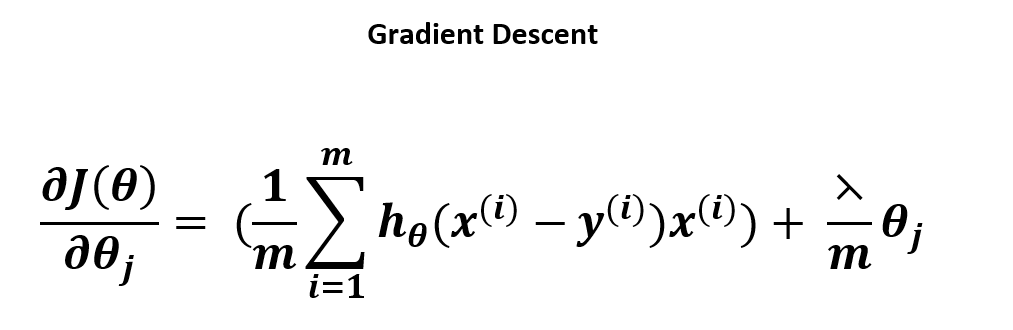

In [11]:
from IPython.display import Image
Image("Reg_GradientDescent.PNG")

In [12]:
grad = log_reg.gradient(initial_theta,X1,y,1)

In [13]:
grad[0:5]

Ones    0.008475
x10     0.018788
x11     0.000078
x20     0.050345
x21     0.011501
dtype: float64

In [14]:
grad = log_reg.gradient(initial_theta,X1,y,10)

In [15]:
grad[0:5]

Ones    0.008475
x10     0.018788
x11     0.000078
x20     0.050345
x21     0.011501
dtype: float64

# Minimum Cost Optimization using Scipy

In [16]:
mincost=log_reg.minimumcost(log_reg.costfunction,initial_theta,X1,y,1)

In [18]:
mincost

array([ 1.27268729,  0.62557014,  1.18096656, -2.01919804, -0.91761481,
       -1.4319422 ,  0.1237592 , -0.36513061, -0.35703374, -0.17485819,
       -1.45843764, -0.05129633, -0.61603955, -0.27464134, -1.19282524,
       -0.24270352, -0.20570014, -0.04499764, -0.27782693, -0.29525851,
       -0.45613306, -1.04377807,  0.02762819, -0.29265632,  0.01543414,
       -0.32759322, -0.14389196, -0.92460091])

In [19]:
ypred = log_reg.predict(X1,mincost)

In [20]:
log_reg.score(y,ypred)

0.8305084745762712

# Verifying using Sklearn Model

In [21]:
from sklearn.linear_model import LogisticRegression

linrig = LogisticRegression(C = 1).fit(X1,y)
linrig.score(X1,y)

0.8305084745762712

# Visualization

In [32]:
def plotdata(lambda_coff):
    initita_theta = np.ones(X1.shape[1])
    mincost=log_reg.minimumcost(log_reg.costfunction,initial_theta,X1,y,lambda_coff)
    xs = np.linspace(-1,1.5,50)
    ys = np.linspace(-1,1.5,50)
    xx,yy = np.meshgrid(xs,ys)
    xsdata = pd.DataFrame({0:xx.ravel(),1:yy.ravel()})
    Xdata = log_reg.mapfeature(xsdata,6)
    initita_theta = np.zeros(X1.shape[1])
    htheta = log_reg.hypothesis(Xdata,mincost)
    htheta = htheta.reshape(50,50)
    plt.plot(data[0][data[2] == 1],data[1][data[2] == 1],'k+',label = 'Admit')
    plt.plot(data[0][data[2] == 0],data[1][data[2] == 0],'yo',label = 'Not Admit')
    plt.contour(xx,yy,htheta,[0.5])
    plt.show()
    return mincost

# Overfitting (No regularization (Lambda = 0))

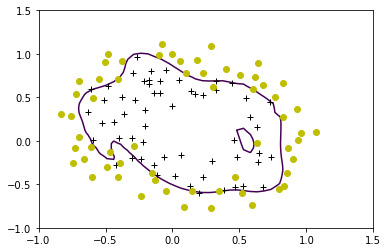

Accuracy 0.8728813559322034


In [34]:
mincost = plotdata(0)
ypred = log_reg.predict(X1,mincost)
print('Accuracy',log_reg.score(y,ypred))

# Regularization

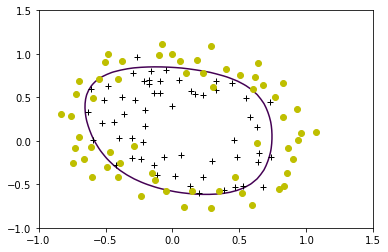

Accuracy 0.8305084745762712


In [35]:
mincost = plotdata(1)
ypred = log_reg.predict(X1,mincost)
print('Accuracy',log_reg.score(y,ypred))

# Underfitting ( lambda = 100)

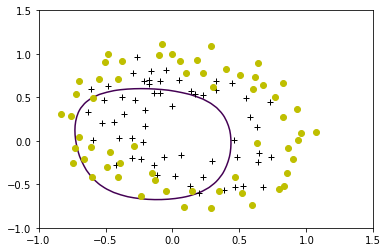

Accuracy 0.6101694915254238


In [36]:
mincost = plotdata(100)
ypred = log_reg.predict(X1,mincost)
print('Accuracy',log_reg.score(y,ypred))